# Tests with image files with significant background

** Scott Prahl**

** 23 Nov 2017, Version 1**

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

import laserbeamsize as lbs

In [1]:
# pixel size in mm for the camera
pixel_size_mm = 3.75/1000           

# array of distances at which images were collected
z2 = [200,300,400,420,470,490,500,520,540,550,570,590,600,650,700,800] #mm

# array of filenames associated with each image
fn2 = ["k-%dmm.png" % number for number in z2]

# read them all into memory 
test_img = [imread(fn) for fn in fn2]

## Test with 16 different images

The `lbs.beam_size()` algorithm works on some files but not on others, as can be seen below.

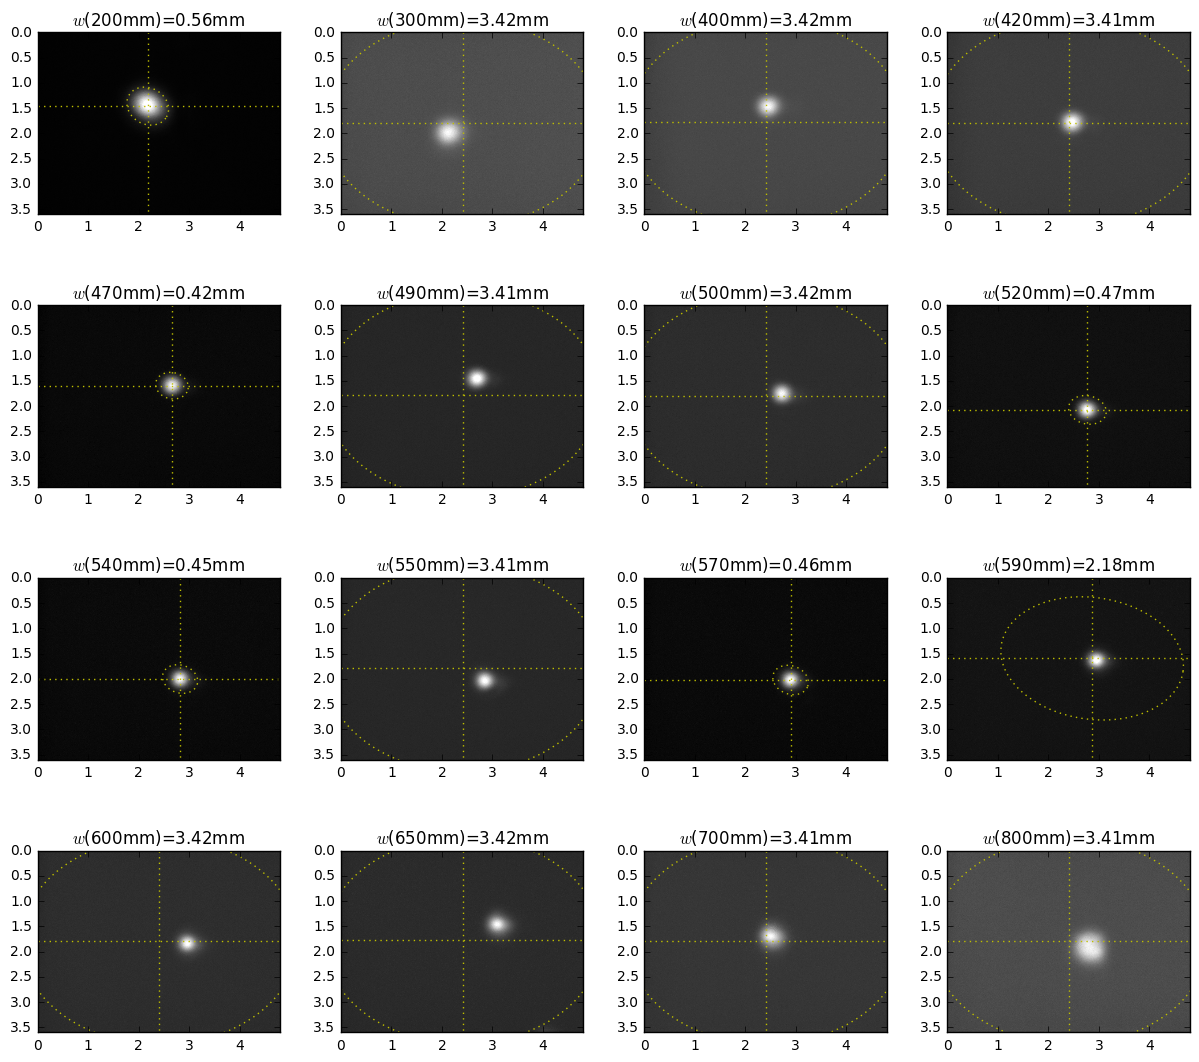

In [7]:
num  = len(z2)
rows = 4
cols = 4
f, axs = plt.subplots(rows,cols,figsize=(15,10))

for i in range(num):
    plt.subplot(rows,cols,i+1)

    # show the beam image with actual dimensions on the axes
    v,h=test_img[i].shape
    plt.imshow(test_img[i], extent=[0,h* pixel_size_mm,v* pixel_size_mm,0], cmap='gray')

    # find the beam center and show it
    xc, yc, dx, dy, phi = lbs.beam_size(test_img[i])
    plt.plot([xc* pixel_size_mm,xc* pixel_size_mm],[0,v* pixel_size_mm],':y')
    plt.plot([0,h* pixel_size_mm],[yc* pixel_size_mm,yc* pixel_size_mm],':y')

    # show ellipse around beam
    xp,yp = lbs.ellipse_arrays(xc,yc,dx,dy,phi)
    plt.plot(xp* pixel_size_mm,yp* pixel_size_mm,':y')

    plt.xlim(0,h* pixel_size_mm)
    plt.ylim(v* pixel_size_mm,0)

    # calculate 1/e^2 radius for symmetric beam to label image
    r=np.sqrt(dx**2+dy**2)/2*pixel_size_mm
    plt.title('$w$(%dmm)=%.2fmm'%(z2[i],r))

plt.subplots_adjust(bottom=0.0, top=1.0, hspace=0.5)
plt.show()

The trick is to increase the threshold to 40% ... found by trial and error.

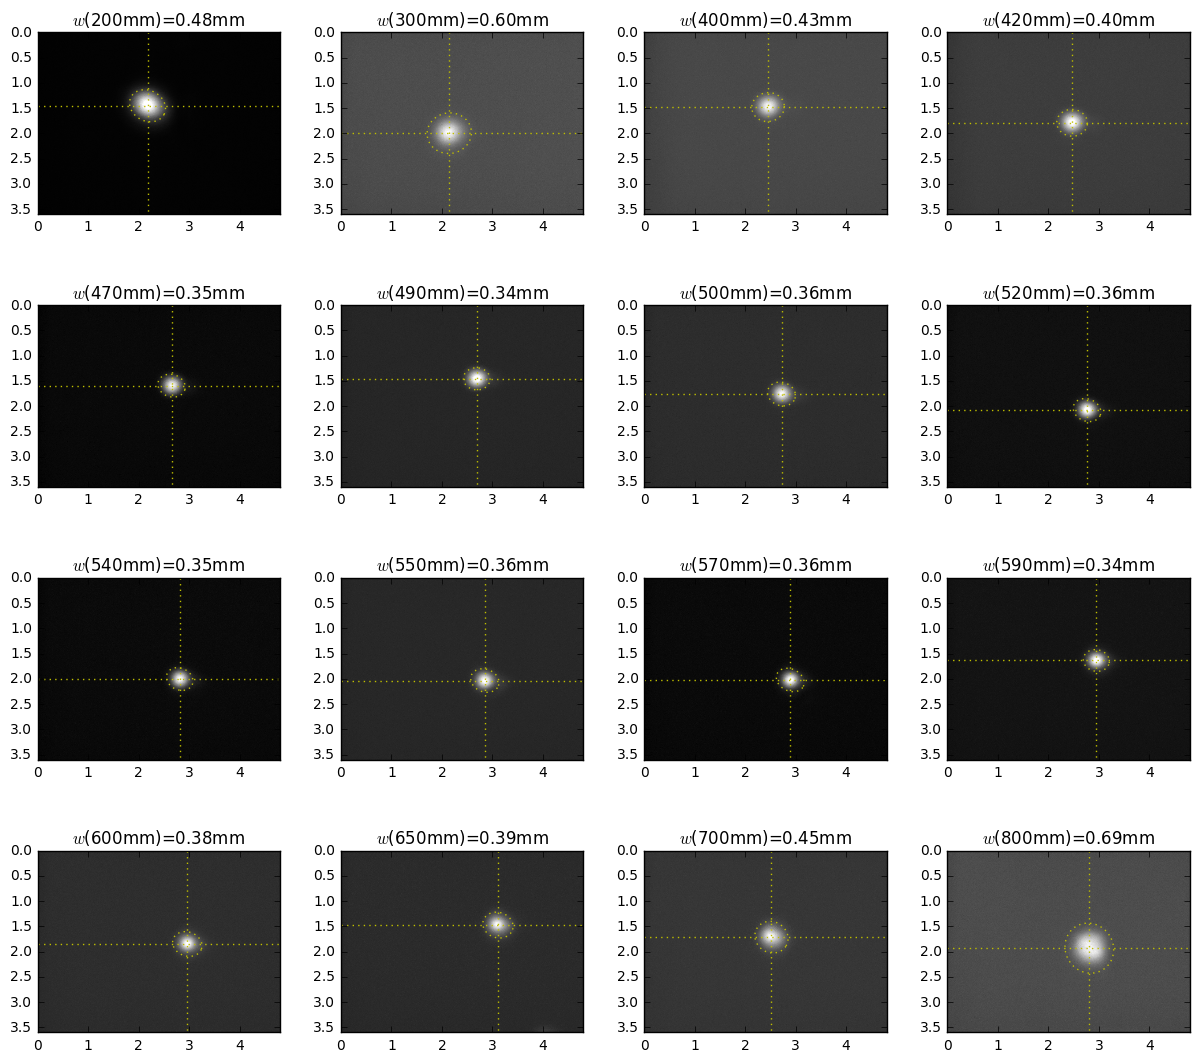

In [8]:
num  = len(z2)
rows = 4
cols = 4
f, axs = plt.subplots(rows,cols,figsize=(15,10))

for i in range(num):
    plt.subplot(rows,cols,i+1)

    # show the beam image with actual dimensions on the axes
    v,h=test_img[i].shape
    plt.imshow(test_img[i], extent=[0,h* pixel_size_mm,v* pixel_size_mm,0], cmap='gray')

    # find the beam center and show it
    xc, yc, dx, dy, phi = lbs.beam_size(test_img[i],threshold=0.4)
    plt.plot([xc* pixel_size_mm,xc* pixel_size_mm],[0,v* pixel_size_mm],':y')
    plt.plot([0,h* pixel_size_mm],[yc* pixel_size_mm,yc* pixel_size_mm],':y')

    # show ellipse around beam
    xp,yp = lbs.ellipse_arrays(xc,yc,dx,dy,phi)
    plt.plot(xp* pixel_size_mm,yp* pixel_size_mm,':y')

    plt.xlim(0,h* pixel_size_mm)
    plt.ylim(v* pixel_size_mm,0)

    # calculate 1/e^2 radius for symmetric beam to label image
    r=np.sqrt(dx**2+dy**2)/2*pixel_size_mm
    plt.title('$w$(%dmm)=%.2fmm'%(z2[i],r))

plt.subplots_adjust(bottom=0.0, top=1.0, hspace=0.5)
plt.show()

In [ ]:
# now create a single array with r**2 = rx**2 + ry**2

num  = len(filenames2)
rx  = np.empty(num)
ry  = np.empty(num)

for i in range(num):
    xc, yc, dx, dy, phi = beam_size(beams[i],threshold=0.4)
    rx[i]=pixel_size_mm*dx/2   #mm
    ry[i]=pixel_size_mm*dy/2   #mm

r = np.sqrt(rx**2+ry**2)       #mm

In [ ]:
def beam_radius(w0, z0, M2, lambdaa, z):
    return np.sqrt(w0**2+M2**2 * (lambdaa/np.pi/w0**2)**2*(z-z0)**2)


# Need array of data so we can plot theory
z = np.linspace(0,1200,100)          #mm

lambdaa = 632.8e-6  # mm
z0 = 550            # mm
w0 = 0.31           # mm
M2 = 1.0            # must be 1 or larger

zR = np.pi*w0**2/lambdaa  #mm

plt.scatter(zimage2, r, color='black')
plt.scatter(zimage2,-r, color='black')

rtop =  beam_radius(w0,z0,M2,lambdaa,z)       
rbot = -beam_radius(w0,z0,M2,lambdaa,z)

plt.plot(z,rtop,color='blue')
plt.plot(z,rbot,color='blue')
plt.plot([0,1200],[0,0],':k')
plt.plot([z0,z0],[-w0,w0],color='red')
plt.plot([z0+zR,z0+zR],[-1,1],':b')
plt.plot([z0-zR,z0-zR],[-1,1],':b')

plt.xlabel("Distance from f=500mm Lens (mm)")
plt.ylabel("Beam Radius (mm)")
plt.title("$w_0$=%.2fmm, $z_0$=%.0fmm, $M^2$=%.2f"%(w0,z0,M2))
plt.annotate('$z_R$', (z0-zR,0.0), fontsize=16)
plt.annotate('$z_R$', (0.95*(z0+zR),0.0), fontsize=16)

plt.xlim(0,1200)
#plt.ylim(-1.1,1.1)
plt.show()